In [53]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import pandas_datareader as web

In [60]:
data =pd.read_csv('/content/sample_data/Tesla.csv')

In [ ]:
data = data.sort_values('Date')

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


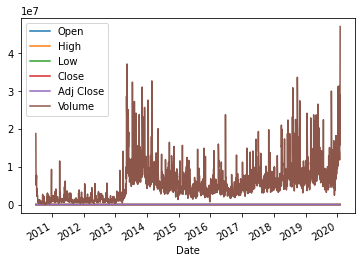

In [ ]:
data.plot()
data.info()

Text(0, 0.5, 'Close')

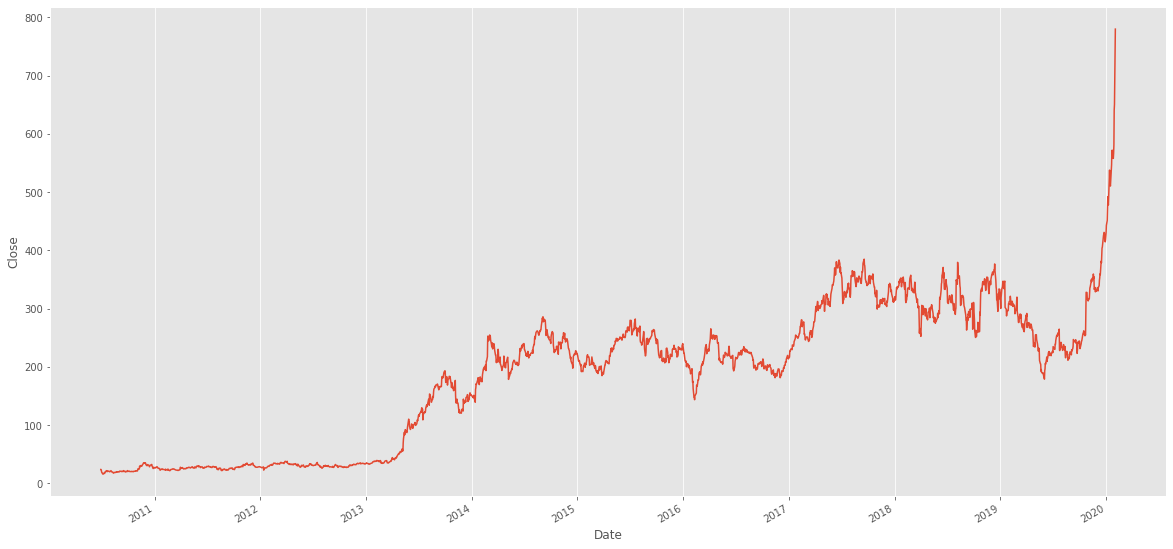

In [ ]:
style.use('ggplot')
data['close'] = data['Close']
fig1, ax1 = plt.subplots(figsize=(20,10))
data['close'].plot(ax=ax1)
plt.grid(axis='y')
plt.ylabel("Close")


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

 taking the average of the highest and lowest recorded prices

---



In [ ]:
high_prices = data.loc[:,'High']
low_prices = data.loc[:,'Low']
mid_prices = (high_prices+low_prices)/2.0
mid_prices

Date
2010-06-29     21.270001
2010-06-30     26.860000
2010-07-01     23.095000
2010-07-02     20.905000
2010-07-06     17.915000
                 ...    
2020-01-28    567.445007
2020-01-29    578.614990
2020-01-30    634.440002
2020-01-31    642.760010
2020-02-03    729.830018
Length: 2416, dtype: float64

Among whole dataset splitting the training data and test data.
by considering data from 2010 to 2019 for prediction of 2020. Theres length of 2416 rows. where at 2395 theres breakpoint of 2019 data.

---



In [1]:
#train_data = mid_prices[:1197]
#test_data = mid_prices[1198:2394]

MinMaxScalar scales all the data to be in the region of 0 and 1 for normalization.

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [30]:
prediction_days = 60
x_train = []
y_train = [] 

In [33]:
for x in range(prediction_days, 2394):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

In [34]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [35]:
#model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
73/73 [==============================] - 11s 85ms/step - loss: 0.0127
Epoch 2/25
73/73 [==============================] - 6s 84ms/step - loss: 9.9812e-04
Epoch 3/25
73/73 [==============================] - 6s 86ms/step - loss: 0.0011
Epoch 4/25
73/73 [==============================] - 6s 85ms/step - loss: 9.0510e-04
Epoch 5/25
73/73 [==============================] - 6s 87ms/step - loss: 9.1674e-04
Epoch 6/25
73/73 [==============================] - 6s 88ms/step - loss: 8.3465e-04
Epoch 7/25
73/73 [==============================] - 7s 90ms/step - loss: 9.4336e-04
Epoch 8/25
73/73 [==============================] - 7s 90ms/step - loss: 8.6362e-04
Epoch 9/25
73/73 [==============================] - 6s 89ms/step - loss: 8.3561e-04
Epoch 10/25
73/73 [==============================] - 6s 88ms/step - loss: 7.4610e-04
Epoch 11/25
73/73 [==============================] - 7s 91ms/step - loss: 7.2533e-04
Epoch 12/25
73/73 [==============================] - 7s 96ms/step - loss: 6.9870e

In [10]:
#Load test data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime(2020,2,3)

In [62]:
test_data = data.iloc[2396:2416].values
actual_prices = data['Close'].values
#test_data
actual_prices

array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])

In [65]:
total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)

IndexError: ignored

In [49]:
 model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days].values
 model_inputs = model_inputs.reshape(-1,1)
 model_inputs = scaler.transform(model_inputs)

NameError: ignored

In [70]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

NameError: ignored

In [67]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

NameError: ignored

In [68]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

NameError: ignored

NameError: ignored

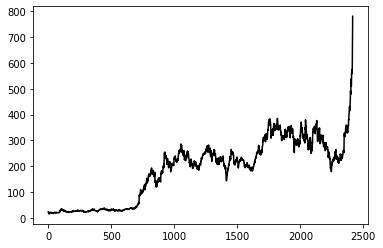

In [69]:
plt.plot(actual_prices, color="black", label=f"Actual price")
plt.plot(predicted_prices, color="green", label=f"Predicted price price")
plt.show()